# 회귀 예측

수치형 값을 예측

- 주택 가격 예측

- 매출액 예측

In [1]:
# 표 형태 데이터 처리를 위한 pandas
import pandas as pd
# 숫자 계산용 numpy
import numpy as np



In [2]:
# 머신러닝 연습용 데이터 다운로드 함수
from sklearn.datasets import fetch_openml
# 보스턴 집값 데이터 가져오기
# as_frame=True → pandas DataFrame 형태
data=fetch_openml(name='boston',version=1,as_frame=True)

# data 안에 어떤 정보들이 있는지 확인
print(data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [3]:
# 데이터 설명서 출력
print(data['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [4]:
# 집의 특징 데이터를 DataFrame으로 변환
df=pd.DataFrame(data['data'],columns=data['feature_names'])

In [5]:
# 정답(집값) 컬럼 추가

df['MEDV']=data['target']

컬럼 소개

속성 수 : 13

CRIM: 범죄율

ZN: 25,000 평방 피트 당 주거용 토지의 비율

INDUS: 비소매(non-retail) 비즈니스 면적 비율

CHAS: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)

NOX: 산화 질소 농도 (천만 분의 1)

RM:주거 당 평균 객실 수

AGE: 1940 년 이전에 건축된 자가 소유 점유 비율

DIS: 5 개의 보스턴 고용 센터까지의 가중 거리

RAD: 고속도로 접근성 지수

TAX: 10,000 달러 당 전체 가치 재산 세율

PTRATIO 도시 별 학생-교사 비율
B: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.

LSTAT: 인구의 낮은 지위

MEDV: 자가 주택의 중앙값 (1,000 달러 단위)

In [6]:
# 데이터 앞부분 확인
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df2=data.frame  ## label값이 있는거
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
data.data  ## label값이 없는거

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [9]:
# 학습용 / 테스트용 데이터 나누는 함수
from sklearn.model_selection import train_test_split

# 입력(X)과 정답(y)을 나누고
# 학습용 / 테스트용으로 분리
x_train,x_test,y_train,y_test=train_test_split(df.drop('MEDV',axis=1),# 입력 데이터 (집 특징)
                                               df['MEDV']) # 정답 데이터 (집값)

# 나눈 데이터 크기 확인
x_train.shape,x_test.shape

((379, 13), (127, 13))

In [10]:
# 학습용 데이터 앞부분 5개 확인
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666.0,20.2,3.50,16.94
366,3.69695,0.0,18.10,0,0.718,4.963,91.4,1.7523,24,666.0,20.2,316.03,14.00
467,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666.0,20.2,331.29,21.32
299,0.05561,70.0,2.24,0,0.400,7.041,10.0,7.8278,5,358.0,14.8,371.58,4.74
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666.0,20.2,396.90,26.77


# 평가지표 만들기


### MSE(Mean Squared Error)

예측값과 실제 값의 차이에대한 제곱에 대하여 평균을 낸값


### MAE(Mean Absolute Error)
예측값과 실제 값의 차이에대한 절대값에 대하여 평균을 낸값


### RMSE(Root Mean Squared Error)
예측값과 실제값의 차이에대한 제곱에대하여 평균을 낸 뒤 루트를 씌운값



In [11]:
# 숫자 계산을 위한 numpy 불러오기
import numpy as np

# 모델이 예측한 값이라고 가정
pred=np.array([3,4,5])

# 실제 정답 값
actual=np.array([1,2,3])


# ===============================
# 평균 제곱 오차 (MSE) 함수
# ===============================
def my_mse(pred,actual):

    # 예측값 - 실제값 → 오차
    # 오차를 제곱해서 음수 제거 + 큰 실수 벌점
    # 평균을 내서 하나의 숫자로 만들기
    return ((pred-actual)**2).mean()

In [12]:
# MSE 계산
my_mse(pred,actual)

np.float64(4.0)

In [13]:
# ===============================
# 평균 절댓값 오차 (MAE) 함수
# ===============================
def my_mae(pred,actual):
    # 예측값 - 실제값 → 오차
    # 절댓값으로 바꿔서 음수 제거
    # 평균을 내서 하나의 숫자로 만들기
    return np.abs(pred-actual).mean()

In [14]:
# MAE 계산
my_mae(pred,actual)

np.float64(2.0)

In [15]:
# ===============================
# 평균 제곱근 오차 (RMSE) 함수
# ===============================
def my_rmse(pred,actual):
    
    # 1. MSE(평균 제곱 오차)를 먼저 계산
    # 2. 제곱된 값을 원래 단위로 되돌리기 위해 루트(√)를 씌움
    return np.sqrt(my_mse(pred,actual))

# RMSE 계산 실행
my_rmse(pred,actual)

np.float64(2.0)

In [16]:
# 회귀 모델 성능 평가 함수들 불러오기
from sklearn.metrics import mean_absolute_error,mean_squared_error

# ===============================
# MAE 비교
# ===============================
# 내가 직접 만든 MAE 함수 결과
# vs
# sklearn 공식 MAE 함수 결과

my_mae(pred,actual),mean_absolute_error(pred,actual)

(np.float64(2.0), 2.0)

In [17]:
# ===============================
# MSE 비교
# ===============================
# 내가 직접 만든 MSE 함수 결과
# vs
# sklearn 공식 MSE 함수 결과

my_mse(pred,actual),mean_squared_error(pred,actual)

(np.float64(4.0), 4.0)

## 모델별 성능 확인을 위한 함수

In [18]:
# 그래프를 그리기 위한 도구
import matplotlib.pyplot as plt
import seaborn as sns

# 여러 모델의 예측 결과를 저장하기 위한 딕셔너리
my_predictions={}


# 그래프에 사용할 색깔 목록 (지금은 사용 안 함)
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
]


# ===============================
# 예측값 vs 실제값 그래프 함수
# ===============================
def plot_predictions(name_,pred,actual):
     # 예측값과 실제값을 하나의 표로 만들기
    df=pd.DataFrame({'prediction':pred, # 모델 예측값
                     'actual':y_test})  # 실제 정답값
    
    # 실제값 기준으로 정렬 (그래프를 보기 좋게)
    df=df.sort_values(by='actual').reset_index(drop=True)

    # 그래프 크기 설정

    plt.figure(figsize=(12,9))

    # 예측값을 빨간 X로 표시
    plt.scatter(df.index,df['prediction'],marker='x',color='r')

     # 실제값을 검은 동그라미로 표시
    plt.scatter(df.index,df['actual'],alpha=0.7,marker='o',color='black')
    # 그래프 제목 (모델 이름)
    plt.title(name_,fontsize=15)
    # 범례 추가
    plt.legend(['prediction','actual'],fontsize=12)
     # 그래프 출력
    plt.show()

def mse_eval(name_,pred,actual):
    # 함수 밖에서 만든 변수 사용
    global my_predictions
    global colors

    # 1. 예측값 vs 실제값 그래프 그리기
    plot_predictions(name_,pred,actual)

    # 2. MSE 계산
    mse=mean_squared_error(pred,actual)

    # 2. MSE 계산
    my_predictions[name_]=mse

    # 4. MSE 기준으로 모델 정렬 (큰 값 → 작은 값)
    y_value=sorted(my_predictions.items(),key=lambda x:x[1],reverse=True)

    # 5. 표로 변환
    df=pd.DataFrame(y_value,columns=['model','mse'])
    print(df)


    # 5. 표로 변환
    min_=df['mse'].min() -10
    max_=df['mse'].max() +10

    # 7. 그래프 크기 설정
    length=len(df)

    plt.figure(figsize=(10,length))
    ax=plt.subplot()

    # 8. y축에 모델 이름 표시
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'],fontsize=15)

    # 9. 가로 막대 그래프
    bars=ax.barh(np.arange(len(df)),df['mse'])


    # 10. 색칠 + 점수 표시
    for i ,v in enumerate(df['mse']):
        idx=np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v+2,i,str(round(v,3)),color='k',fontsize=15,fontweight='bold')
    plt.title('MSE Error',fontsize=18)

    # 11. 제목 및 범위 설정
    plt.xlim(min_,max_)

    # 12. 그래프 출력
    plt.show()


# 저장된 모델 중 하나를 삭제하는 함수
def remove_model(name_):

    # 함수 밖에 있는 모델 성적표 딕셔너리 사용
    global my_predictions
    try:
        # 딕셔너리에서 해당 모델 이름(key)을 삭제
        del my_predictions[name_]
    # 만약 해당 모델 이름이 없으면
    except KeyError:
        # 삭제 실패 → False 반환
        return False
     # 삭제 성공 → True 반환
    return True

## Linear Regression

In [19]:
# 선형회귀 모델 불러오기
from sklearn.linear_model import LinearRegression


# ===============================
# 1. 모델 생성
# ===============================
# n_jobs=-1 → CPU 전부 사용
model=LinearRegression(n_jobs=-1)

In [20]:
x_test.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

In [21]:
# ===============================
# 2. 데이터 타입 통일
# ===============================
# 숫자 계산을 위해 float 타입으로 변환
x_train=x_train.astype(float)
x_test=x_test.astype(float)

In [22]:
# ===============================
# 3. 모델 학습 (공부)
# ===============================
# x_train : 문제
# y_train : 정답
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [23]:
# ===============================
# 4. 테스트 데이터 예측
# ===============================
pred=model.predict(x_test)

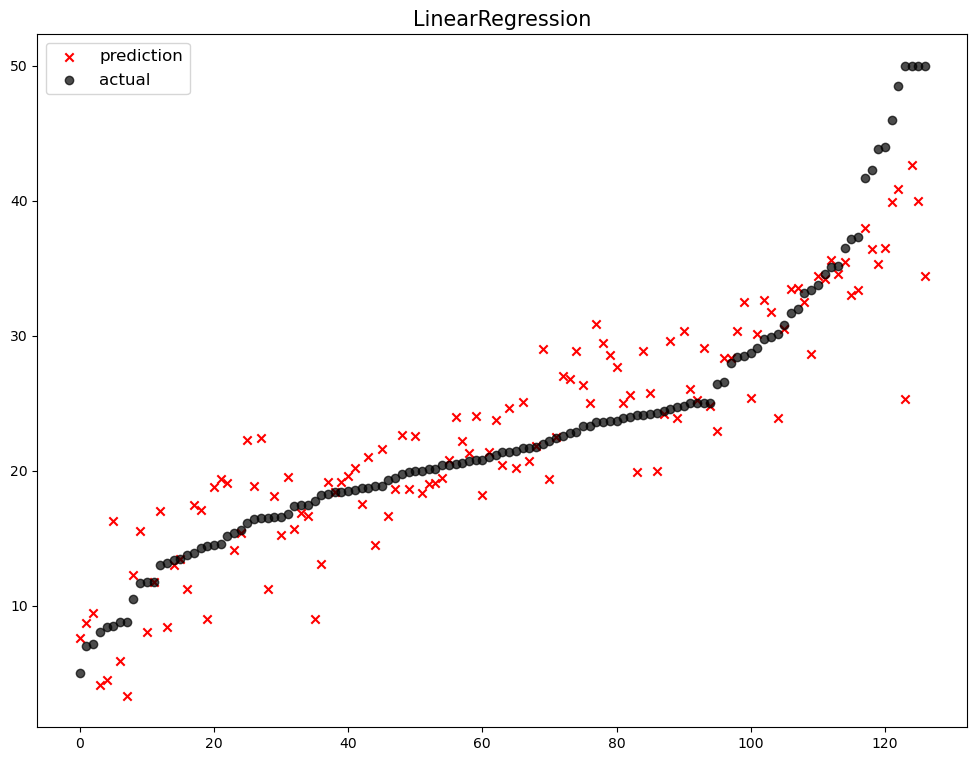

              model       mse
0  LinearRegression  19.93771


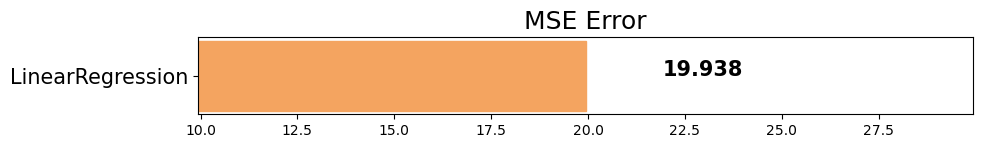

In [24]:
# ===============================
# 5. 성능 평가 + 시각화
# ===============================
# 모델 이름 + 예측값 + 실제값 전달
mse_eval('LinearRegression',pred,y_test)

# 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의
penalty
를 부여하는 것

### L2 규제 (L2 Regularization)

각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다.
λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

### L1 규제 (L1 Regularization)
가중치의 제곱의 합이 아닌
가중치의 합
을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다.
어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다.

In [25]:
def plot_coef(columns,coef):
    # 변수 이름과 계수를 하나의 표로 만들기
    coef_df=pd.DataFrame(list(zip(columns,coef)))
     # 컬럼 이름 설정
    coef_df.columns=['feature','coef']

    # 계수 크기 기준으로 정렬
    coef_df=coef_df.sort_values('coef',ascending=False).reset_index(drop=True)

    # 그래프 생성
    fig,ax=plt.subplots(figsize=(9,7))
    # 가로 막대 그래프 (계수 크기)
    ax.barh(np.arange(len(coef_df)),coef_df['coef'])

    # y축 위치
    idx=np.arange(len(coef_df))
    ax.set_yticks(idx)
    # y축에 변수 이름 표시
    ax.set_yticklabels(coef_df['feature'])

    # 여백 정리
    fig.tight_layout()
    # 그래프 출력
    plt.show()

## 왜 Lasso와 Ridge는 linear regression계열 회귀만 거의 가능한데 분류인 Logistic Regression만 가능할까?
이 질문은 **로지스틱 회귀의 정체를 정확히 꿰뚫는 질문**이야 👍
왜 가능한지 **수학·개념·직관** 세 층으로 정리해줄게.

---

## 🔑 한 줄 결론부터

> **로지스틱 회귀는 겉은 분류지만,
> 속은 ‘선형 회귀 + 함수 하나 덧씌운 모델’이기 때문에
> Lasso / Ridge가 가능하다.**

---

## 1️⃣ 핵심 이유 한 가지 (이것만 기억해도 됨)

> **Lasso / Ridge는 “계수(coef)에 벌점을 주는 규제”이고,
> 로지스틱 회귀에는 계수가 있다.**

끝.

---

## 2️⃣ 로지스틱 회귀의 내부 구조 (제일 중요)

로지스틱 회귀가 예측할 때 **속에서 하는 일**은 이거야 👇

### (1) 먼저 선형 결합을 만든다

```
z = w1·x1 + w2·x2 + ... + b
```

* 이 부분은 **Linear Regression과 100% 동일**
* 여기서 `w1, w2, ...` 가 바로 **계수(coef)**

---

### (2) 그 다음에 sigmoid만 씌운다

```
p = sigmoid(z)
```

* 값을 0~1 사이 확률로 바꿔주는 함수
* **분류처럼 보이게 만드는 역할**

📌 핵심 포인트

> **Lasso / Ridge는 sigmoid 이전의
> `w·x + b`에 적용된다**

---

## 3️⃣ 그래서 규제를 어디에 거냐면…

### 로지스틱 회귀의 학습 목표는 사실 이거야

```
손실 함수 (log loss)
+ 규제항 (L1 or L2)
```

### 🔹 Ridge (L2)

```
log loss + α · (w1² + w2² + ...)
```

### 🔹 Lasso (L1)

```
log loss + α · (|w1| + |w2| + ...)
```

👉 **완전히 선형 회귀와 동일한 방식**
👉 단지 **오차 함수만 다를 뿐**

---

## 4️⃣ “분류 모델인데 왜 계수가 중요해?”

분류지만, 로지스틱 회귀는 이렇게 생각하면 돼 👇

> “각 변수가
> **1일 확률을 얼마나 밀어 올리거나 내리는지**
> 그 힘을 숫자로 표현한 것”

그래서:

* coef > 0 → 1일 확률 ↑
* coef < 0 → 1일 확률 ↓
* coef = 0 → 그 변수는 **아예 안 씀**

👉 이게 바로 **Lasso가 변수 선택을 할 수 있는 이유**

---

## 5️⃣ Decision Tree와 다시 비교해보면

| 모델                  | 내부에 계수 있음? | Lasso/Ridge |
| ------------------- | ---------- | ----------- |
| Linear Regression   | ⭕          | ⭕           |
| Logistic Regression | ⭕          | ⭕           |
| Decision Tree       | ❌          | ❌           |

👉 **“계수가 있느냐 없느냐”가 전부**

---

## 6️⃣ sklearn에서 왜 이렇게 쓰냐면

```python
LogisticRegression(penalty='l1')  # Lasso
LogisticRegression(penalty='l2')  # Ridge
```

sklearn 입장에서는:

> “이 모델은 선형결합 기반이니까
> 규제 옵션을 제공하는 게 당연하다”

---

## 7️⃣ 직관적인 비유 하나로 끝내자 🎯

* **Linear Regression**

  * “숫자를 예측”
* **Logistic Regression**

  * “확률을 예측”

하지만 둘 다 속으로는:

> **“변수 × 계수의 합”을 계산한다**

그래서 둘 다:

* 계수 있음 ⭕
* 규제 가능 ⭕
* Lasso / Ridge 가능 ⭕

---

## 🔥 최종 한 줄 정리 (이건 꼭 기억해)

> **로지스틱 회귀는
> ‘선형 모델 + sigmoid’이기 때문에
> 계수가 존재하고,
> 그래서 Lasso / Ridge가 가능하다.**

이제 누가 물어보면
“로지스틱도 선형 모델이라서요”
이 한 문장으로 끝낼 수 있어 👍


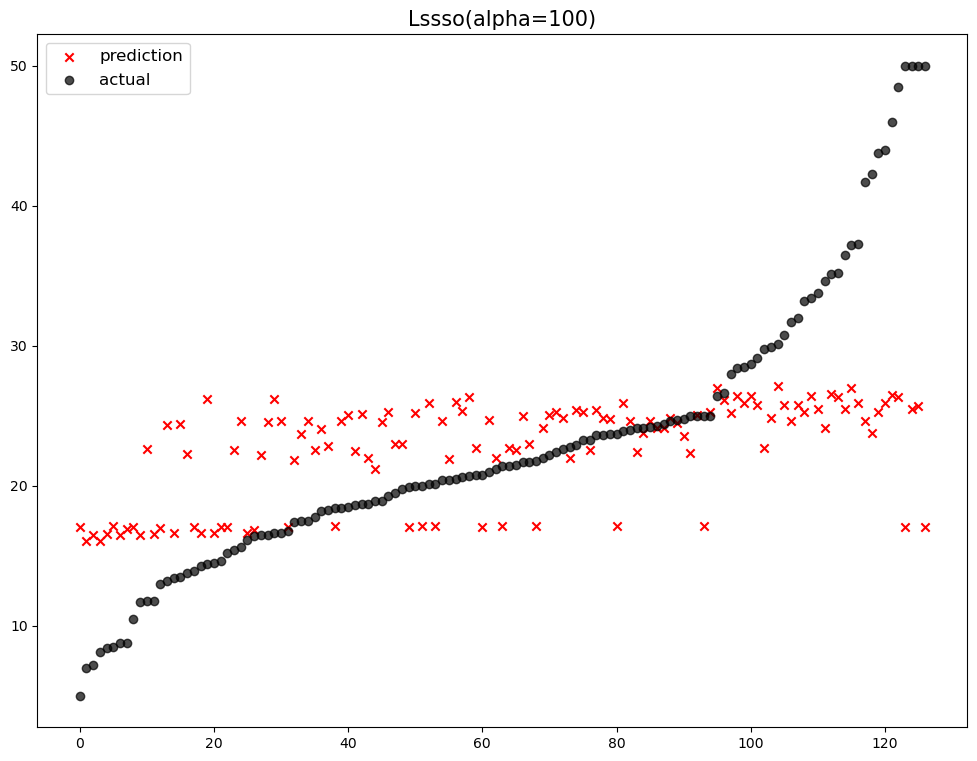

              model        mse
0  Lssso(alpha=100)  72.303868
1  LinearRegression  19.937710


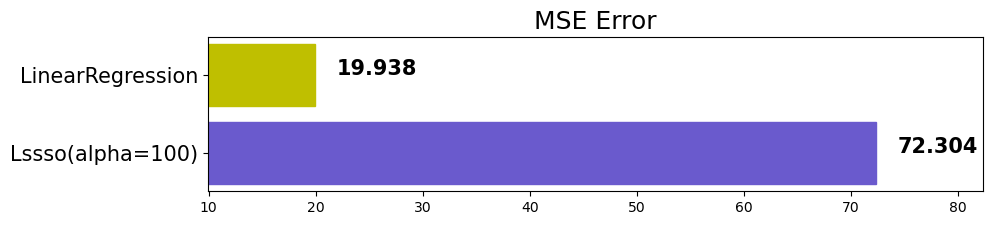

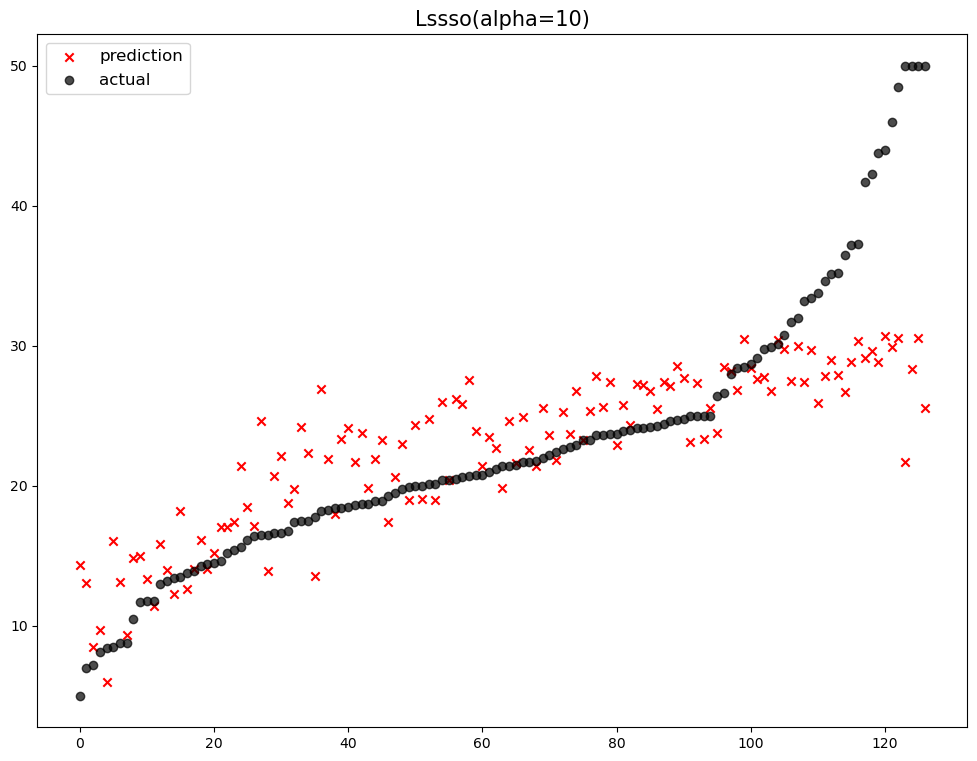

              model        mse
0  Lssso(alpha=100)  72.303868
1   Lssso(alpha=10)  41.094651
2  LinearRegression  19.937710


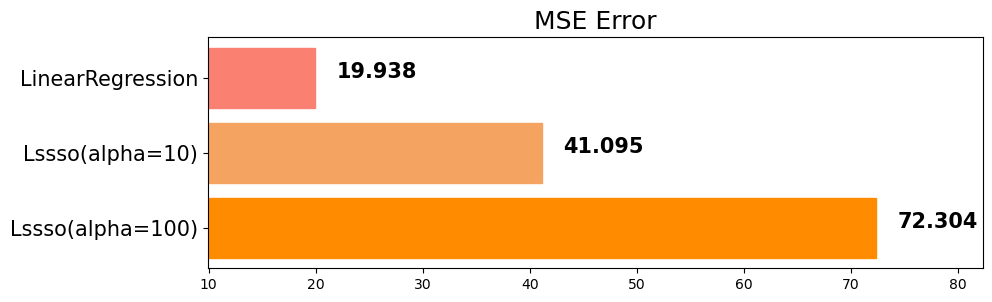

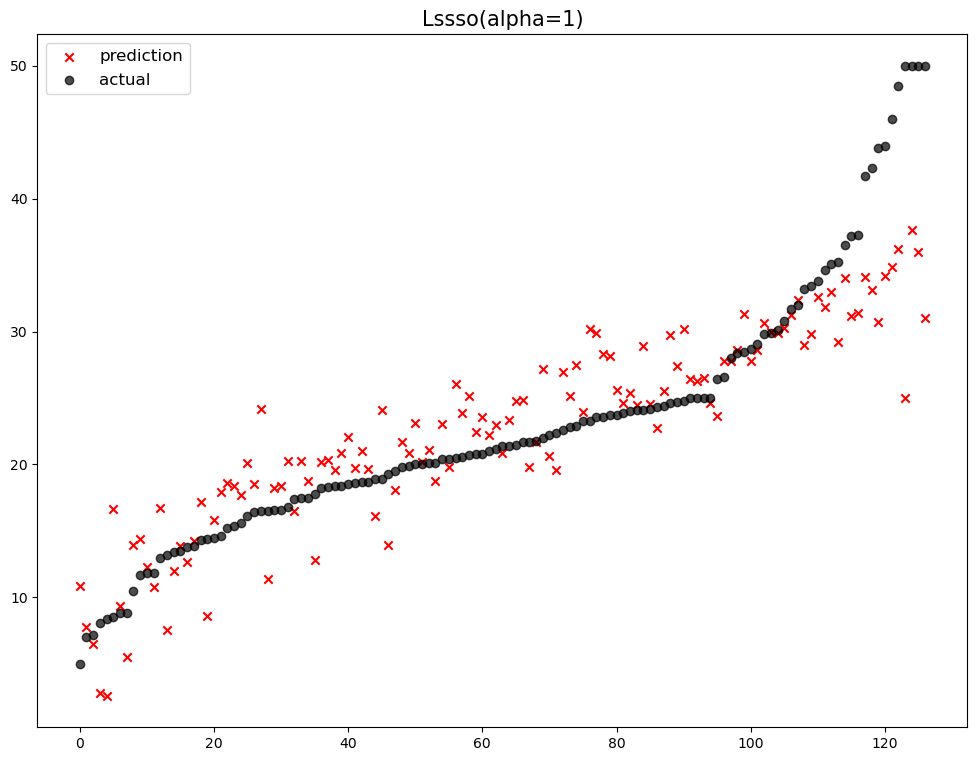

              model        mse
0  Lssso(alpha=100)  72.303868
1   Lssso(alpha=10)  41.094651
2    Lssso(alpha=1)  25.361057
3  LinearRegression  19.937710


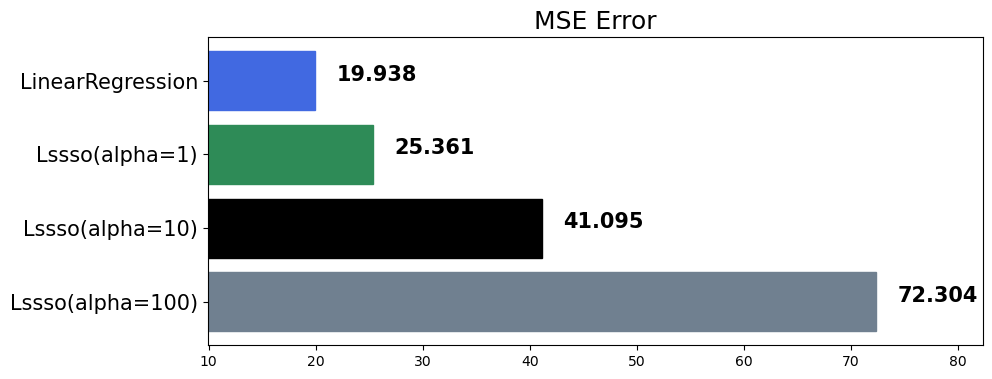

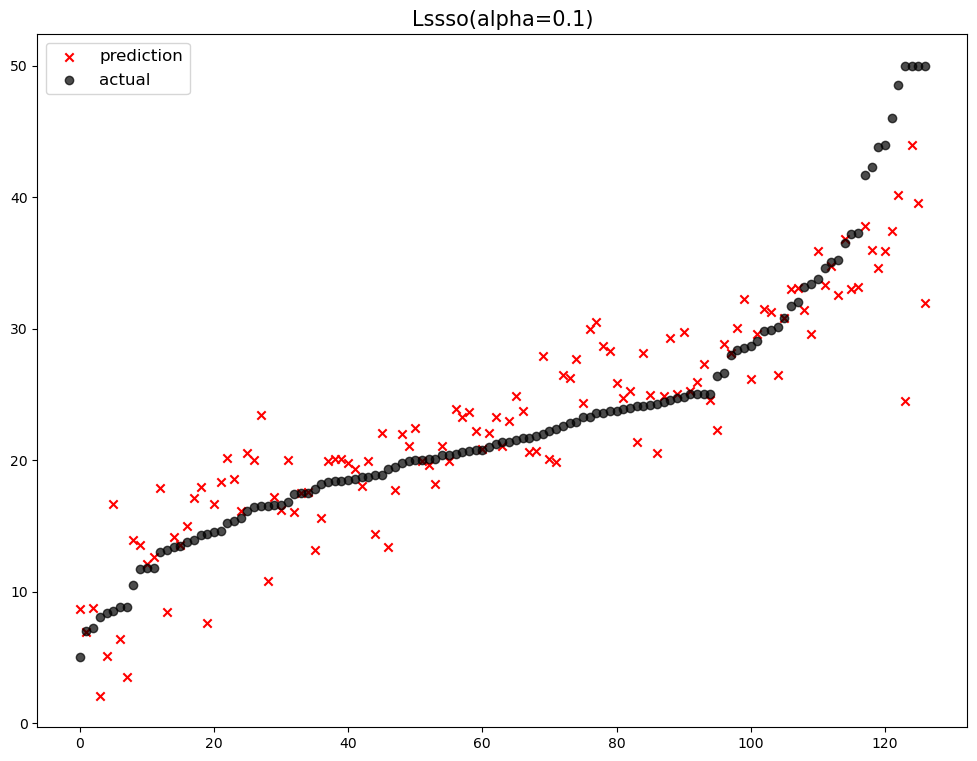

              model        mse
0  Lssso(alpha=100)  72.303868
1   Lssso(alpha=10)  41.094651
2    Lssso(alpha=1)  25.361057
3  Lssso(alpha=0.1)  20.398051
4  LinearRegression  19.937710


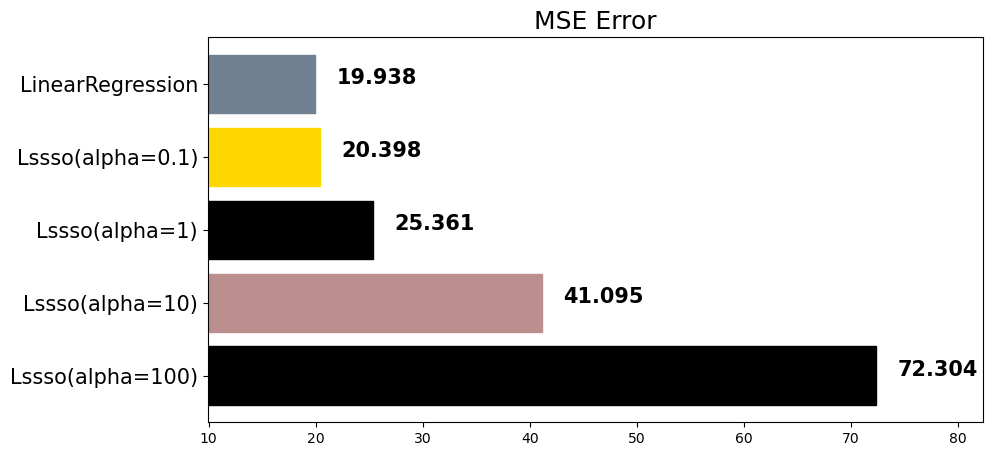

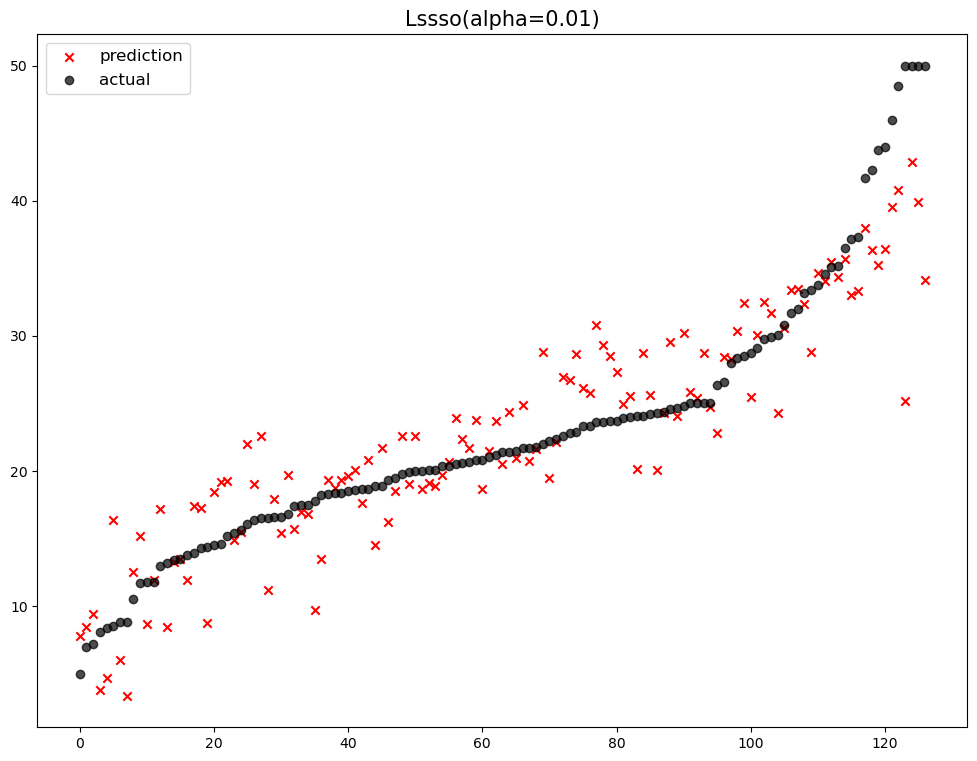

               model        mse
0   Lssso(alpha=100)  72.303868
1    Lssso(alpha=10)  41.094651
2     Lssso(alpha=1)  25.361057
3   Lssso(alpha=0.1)  20.398051
4   LinearRegression  19.937710
5  Lssso(alpha=0.01)  19.666745


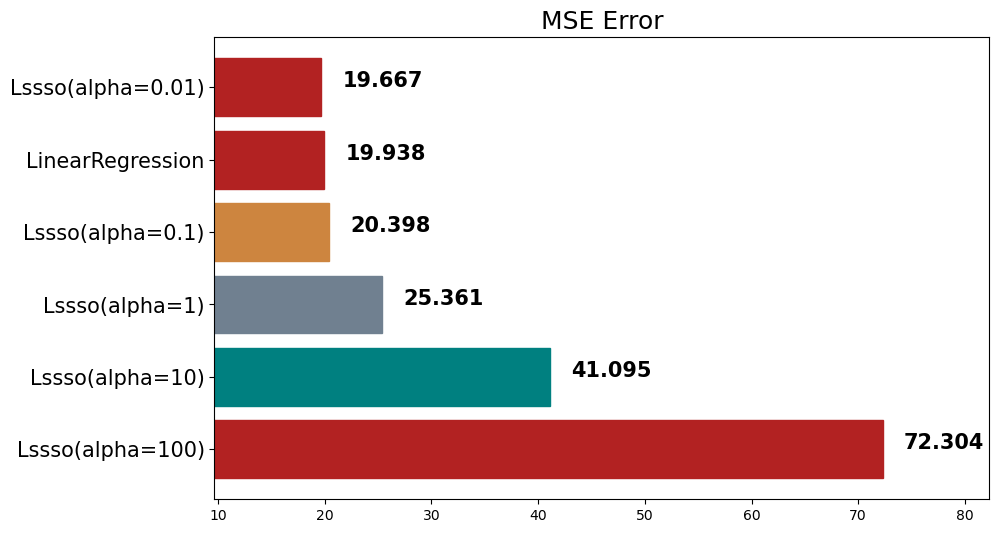

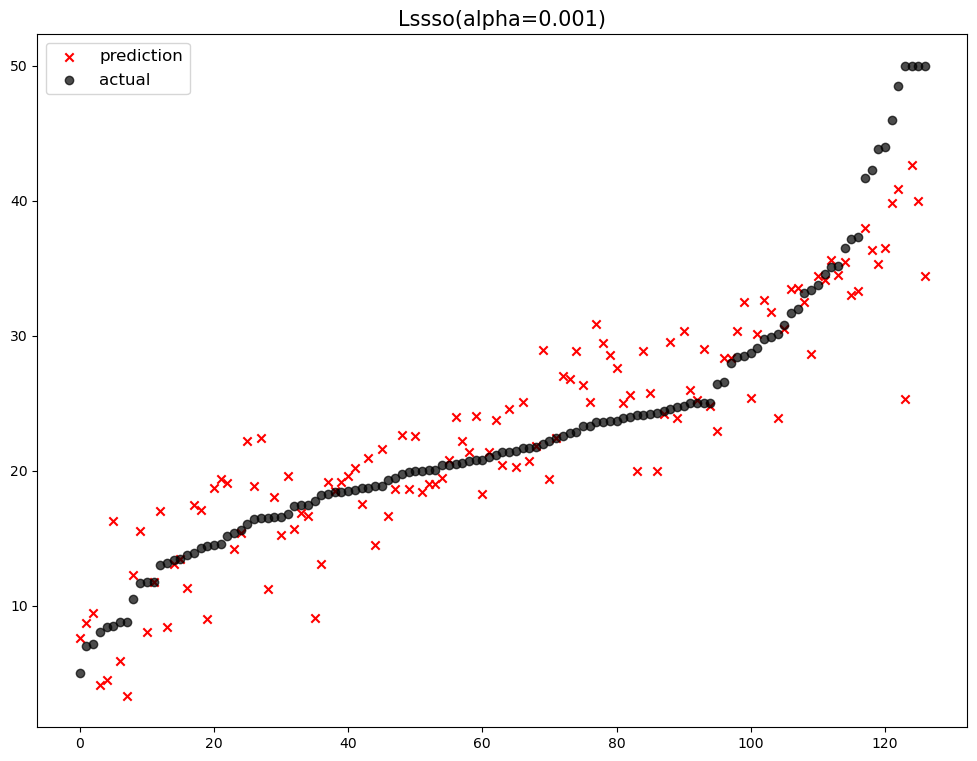

                model        mse
0    Lssso(alpha=100)  72.303868
1     Lssso(alpha=10)  41.094651
2      Lssso(alpha=1)  25.361057
3    Lssso(alpha=0.1)  20.398051
4    LinearRegression  19.937710
5  Lssso(alpha=0.001)  19.905387
6   Lssso(alpha=0.01)  19.666745


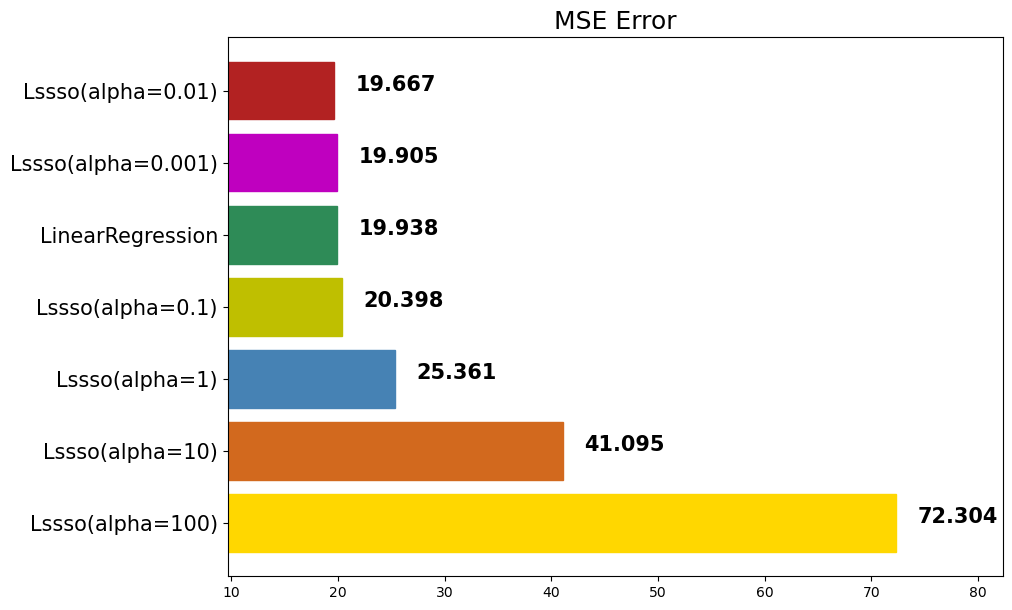

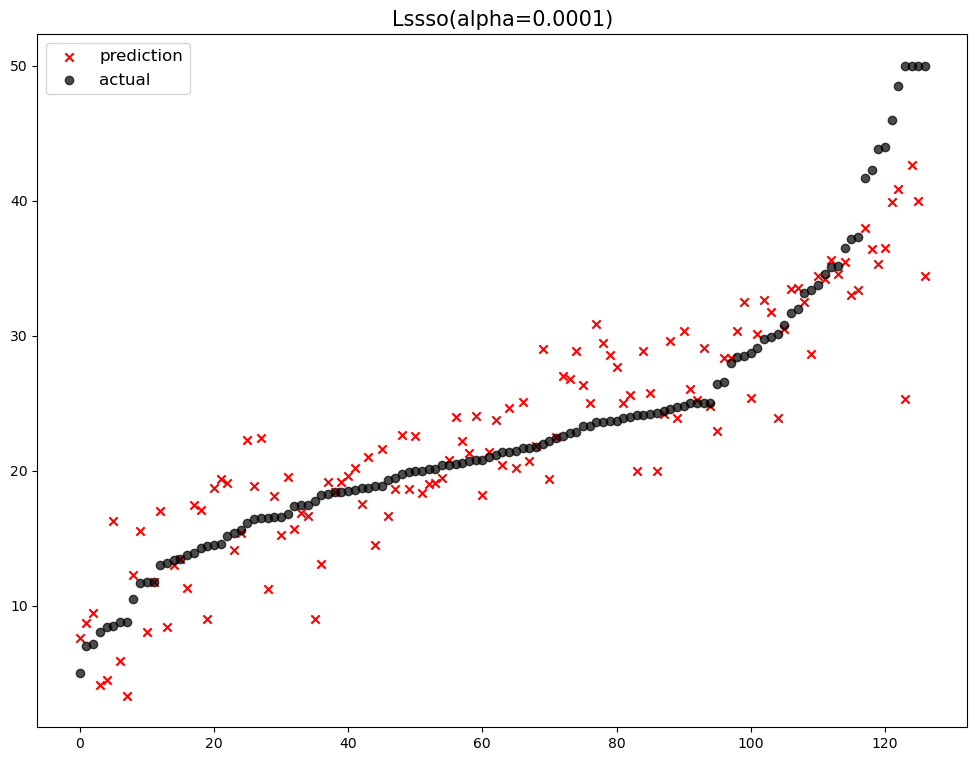

                 model        mse
0     Lssso(alpha=100)  72.303868
1      Lssso(alpha=10)  41.094651
2       Lssso(alpha=1)  25.361057
3     Lssso(alpha=0.1)  20.398051
4     LinearRegression  19.937710
5  Lssso(alpha=0.0001)  19.934426
6   Lssso(alpha=0.001)  19.905387
7    Lssso(alpha=0.01)  19.666745


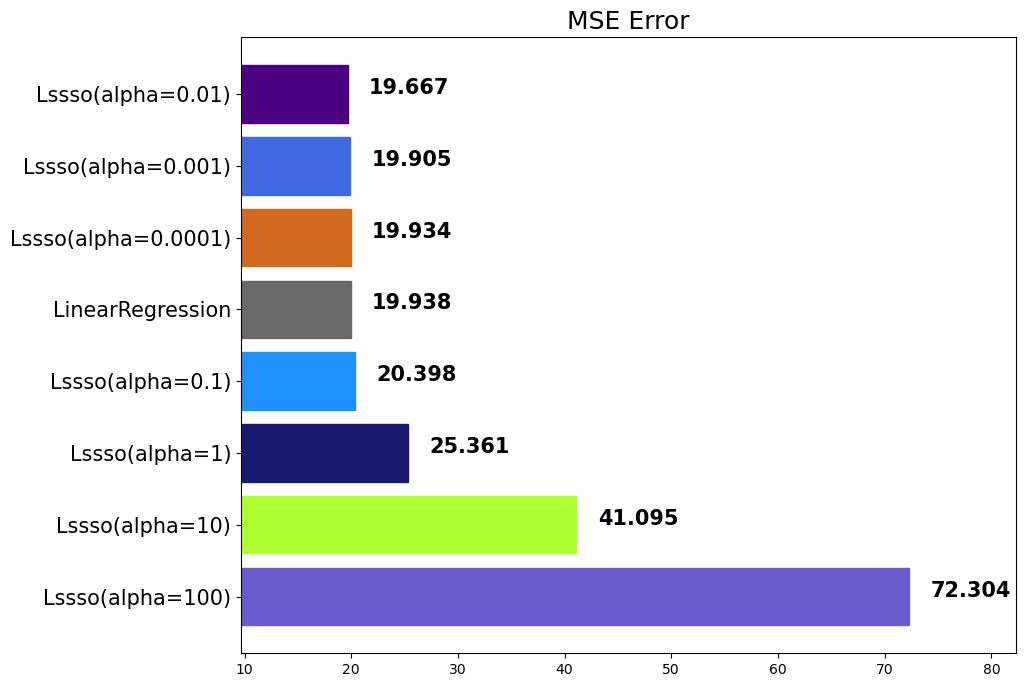

In [26]:
from sklearn.linear_model import Lasso
# 다양한 규제 강도(alpha) 값
alphas=[100,10,1,0.1,0.01,0.001,0.0001]


for alpha in alphas:
    # Lasso 모델 생성
    lasso=Lasso(alpha=alpha)
    # 모델 학습
    lasso.fit(x_train,y_train)
    # 테스트 데이터 예측
    pred=lasso.predict(x_test)
     # 성능 평가 (MSE + 시각화)
    mse_eval('Lssso(alpha={})'.format(alpha),pred,y_test)

    

In [27]:
# ===============================
# 1. 규제가 매우 강한 Lasso 모델
# ===============================
lasso_100=Lasso(alpha=100)

# 모델 학습 (중요하지 않은 변수는 0으로 제거됨)
lasso_100.fit(x_train,y_train)

# 테스트 데이터 예측
lasso_pred_100=lasso_100.predict(x_test)


# ===============================
# 2. 규제가 매우 약한 Lasso 모델
# ===============================


# 모델 학습 (거의 LinearRegression과 비슷)
lasso_001=Lasso(alpha=0.001)
# 모델 학습 (거의 LinearRegression과 비슷)
lasso_001.fit(x_train,y_train)

# 테스트 데이터 예측
lasso_pred_001=lasso_001.predict(x_test)



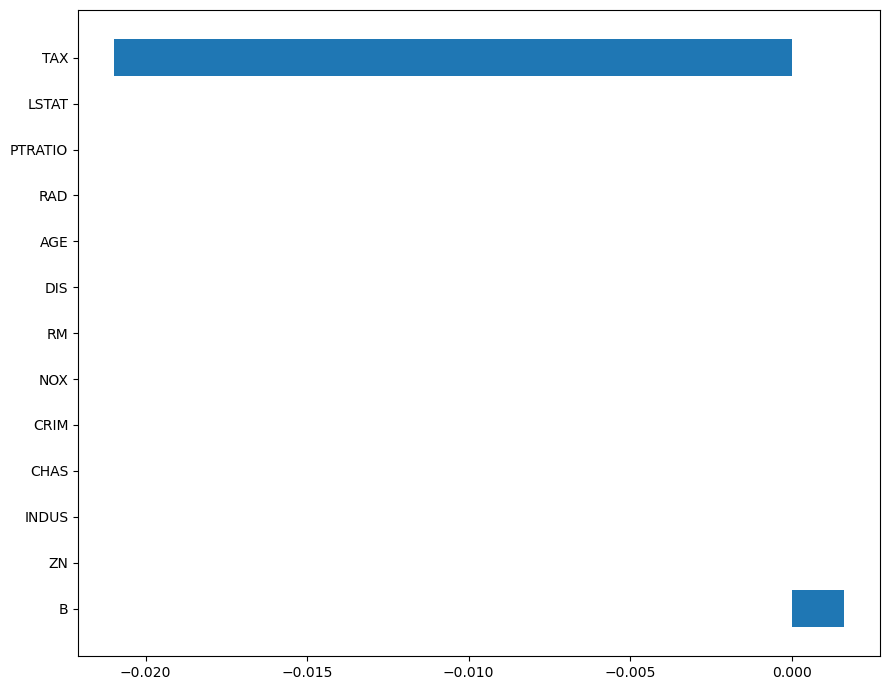

In [28]:
# ===============================
# 3. alpha=100일 때 계수 시각화
# ===============================
# 어떤 변수가 살아남았는지 확인
plot_coef(x_train.columns,lasso_100.coef_)

In [ ]:
# 각 변수의 계수 확인
# → 대부분 0이면: 이 변수들은 필요 없다고 판단한 것
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02096527,
       -0.        ,  0.0016026 , -0.        ])

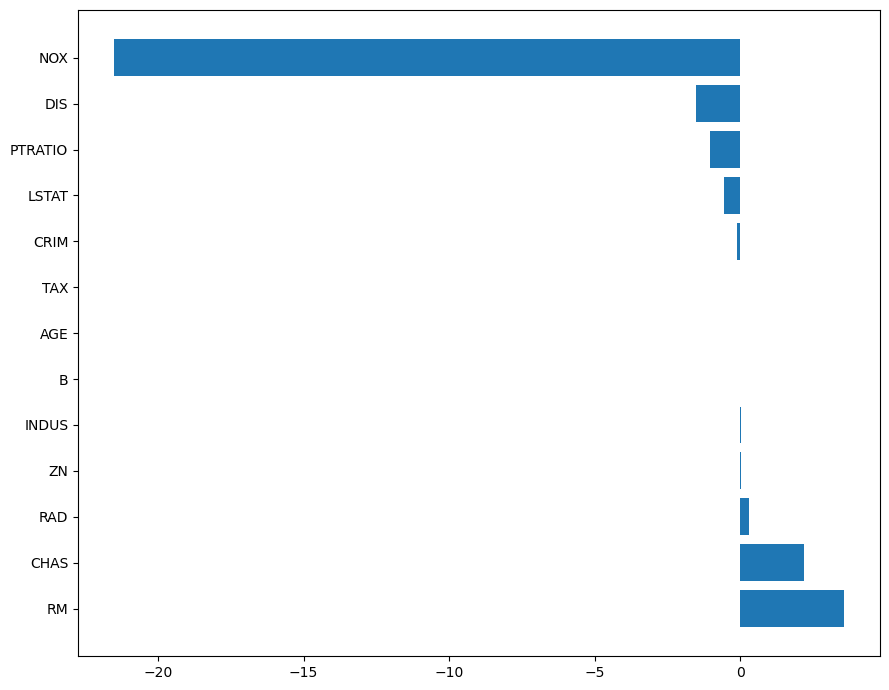

In [ ]:
# 계수 시각화
# → 어떤 변수가 중요하게 쓰였는지 한눈에 보기
plot_coef(x_train.columns,lasso_001.coef_)

In [ ]:
# Lasso(alpha=0.001) 모델이 학습을 끝낸 후
# 각 입력 변수(feature)가 결과값(y)에
# 얼마나 영향을 주는지 계수(coef)를 확인하는 코드
lasso_001.coef_

array([-1.16591371e-01,  2.98261128e-02,  2.37184972e-02,  2.17442987e+00,
       -2.14941780e+01,  3.54755904e+00, -6.48623196e-04, -1.53689065e+00,
        3.06815786e-01, -1.05362719e-02, -1.04398635e+00,  8.29091944e-03,
       -5.49618518e-01])

## ElasticNet

엘라스틱넷 규제는 “선형모델 계열”에서 사용하는 규제 방식이다.
(선형회귀 + 로지스틱회귀 둘 다 가능)

l1_ratio(default=0.5)

l1_ratio=0(L2 규제만 사용)
l1_ratio=1(L1 규제만 사용)

- 0 <l1_ratio< 1 (L1 and L2 규제의 혼합사용)


6️⃣ 기억하기 쉬운 문장 🌟

엘라스틱넷은
“계수가 있는 선형모델에서만 쓰는 규제다.”

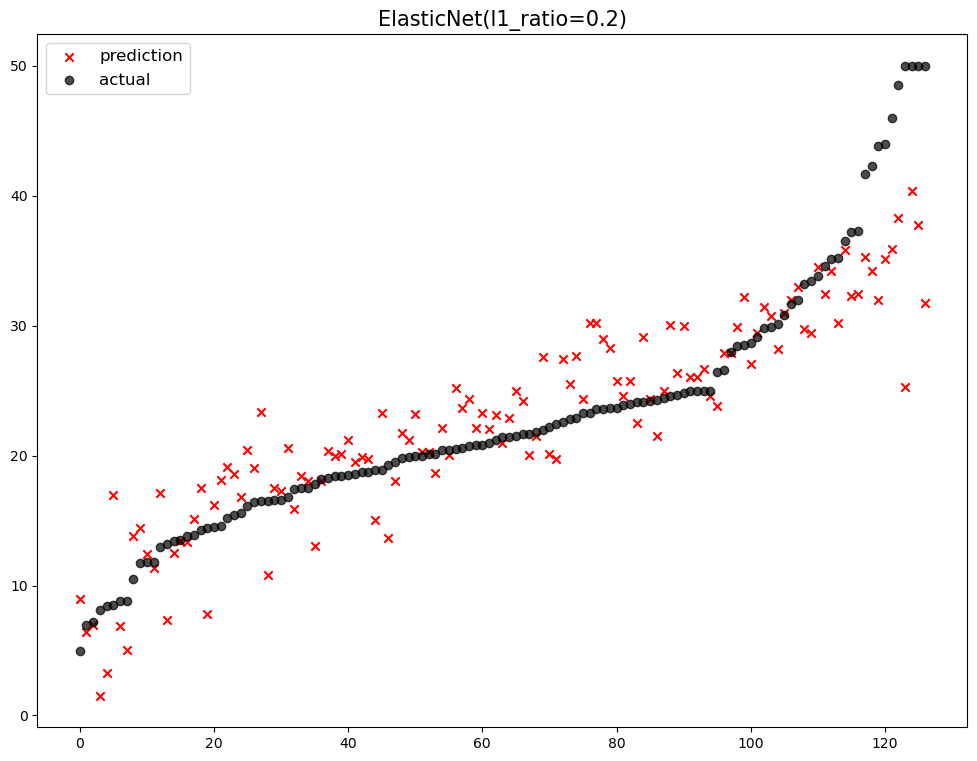

                      model        mse
0          Lssso(alpha=100)  72.303868
1           Lssso(alpha=10)  41.094651
2            Lssso(alpha=1)  25.361057
3  ElasticNet(l1_ratio=0.2)  22.750969
4          Lssso(alpha=0.1)  20.398051
5          LinearRegression  19.937710
6       Lssso(alpha=0.0001)  19.934426
7        Lssso(alpha=0.001)  19.905387
8         Lssso(alpha=0.01)  19.666745


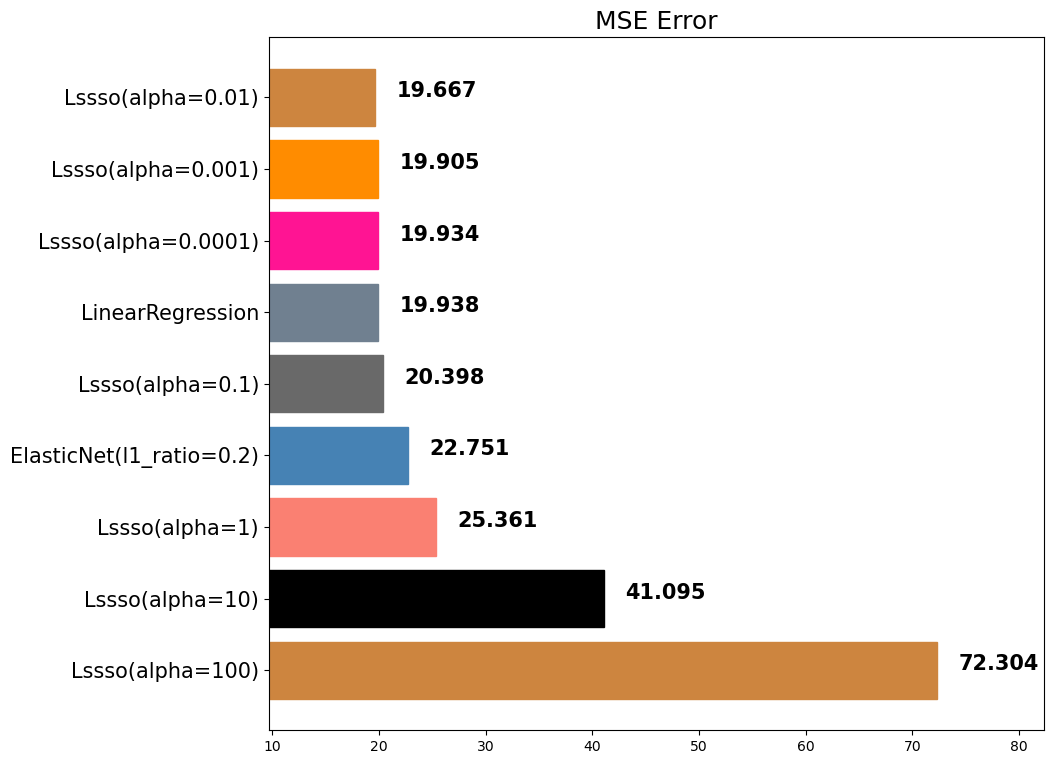

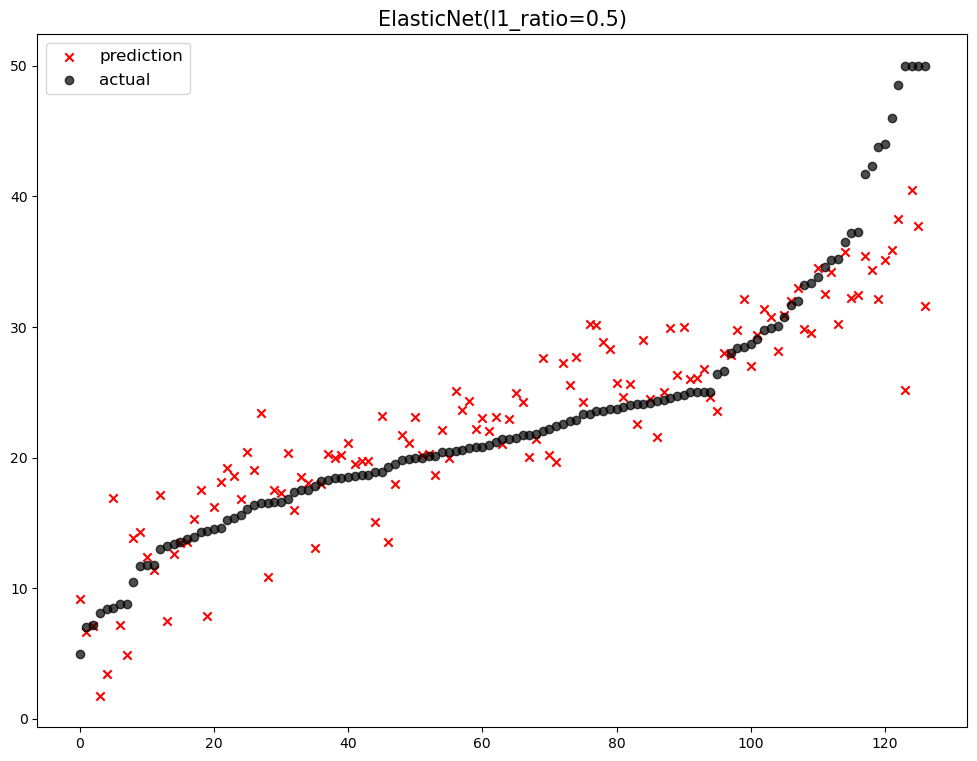

                      model        mse
0          Lssso(alpha=100)  72.303868
1           Lssso(alpha=10)  41.094651
2            Lssso(alpha=1)  25.361057
3  ElasticNet(l1_ratio=0.2)  22.750969
4  ElasticNet(l1_ratio=0.5)  22.632822
5          Lssso(alpha=0.1)  20.398051
6          LinearRegression  19.937710
7       Lssso(alpha=0.0001)  19.934426
8        Lssso(alpha=0.001)  19.905387
9         Lssso(alpha=0.01)  19.666745


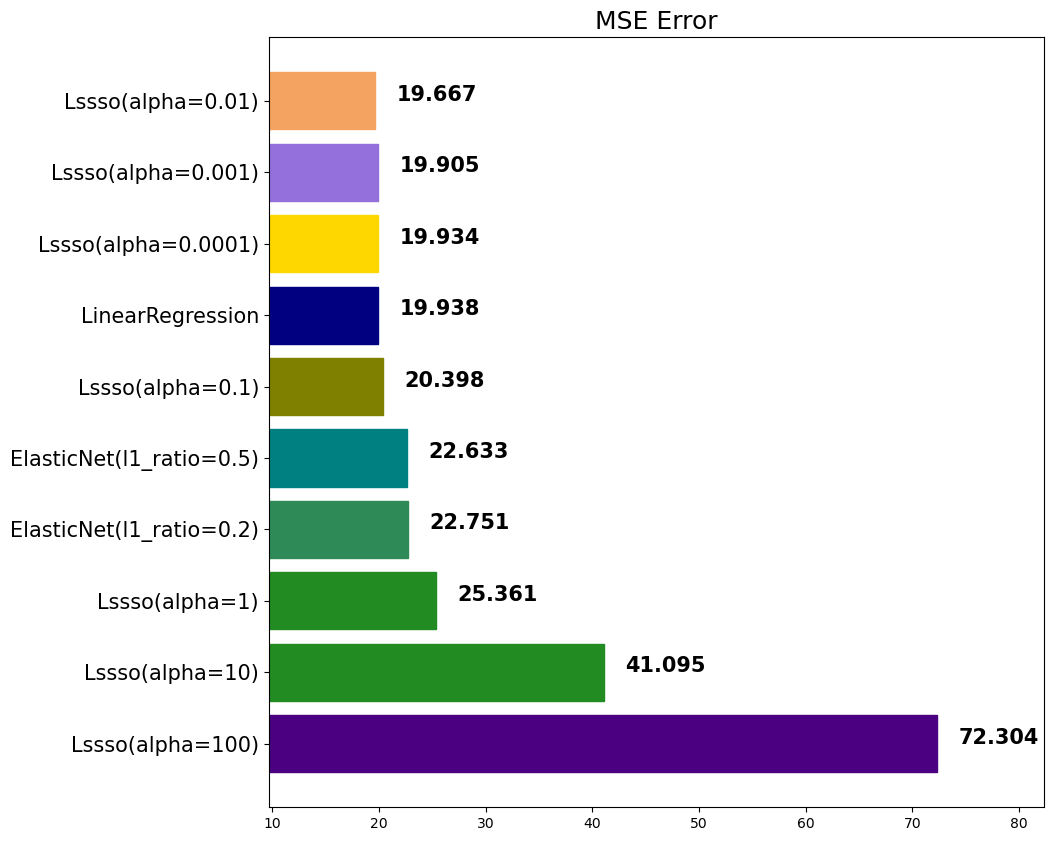

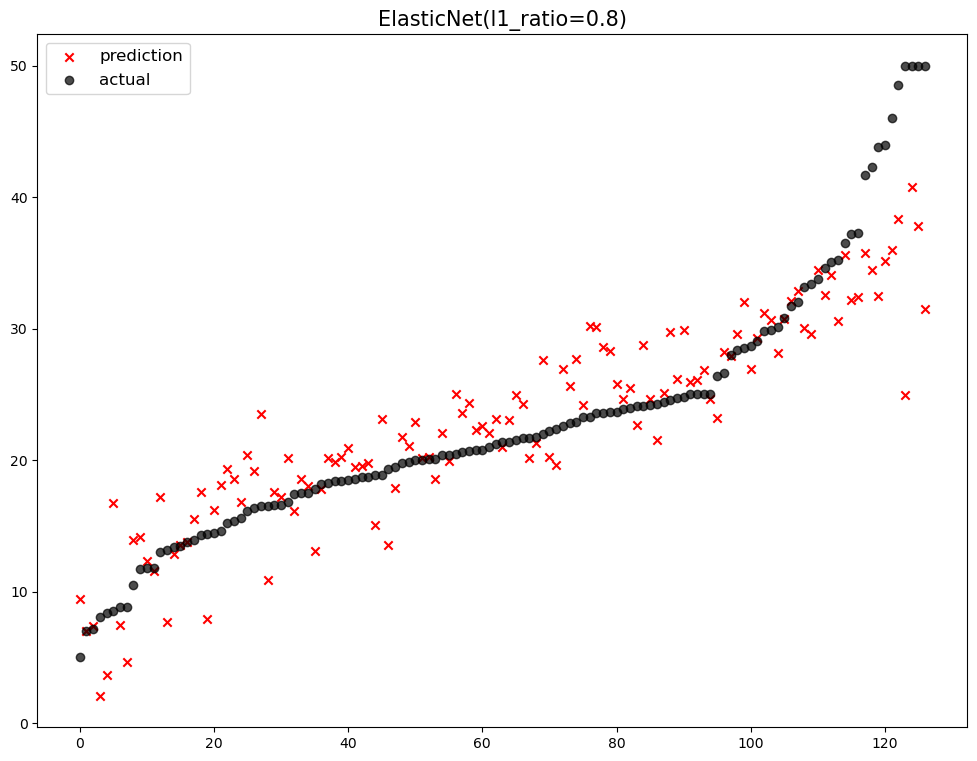

                       model        mse
0           Lssso(alpha=100)  72.303868
1            Lssso(alpha=10)  41.094651
2             Lssso(alpha=1)  25.361057
3   ElasticNet(l1_ratio=0.2)  22.750969
4   ElasticNet(l1_ratio=0.5)  22.632822
5   ElasticNet(l1_ratio=0.8)  22.333711
6           Lssso(alpha=0.1)  20.398051
7           LinearRegression  19.937710
8        Lssso(alpha=0.0001)  19.934426
9         Lssso(alpha=0.001)  19.905387
10         Lssso(alpha=0.01)  19.666745


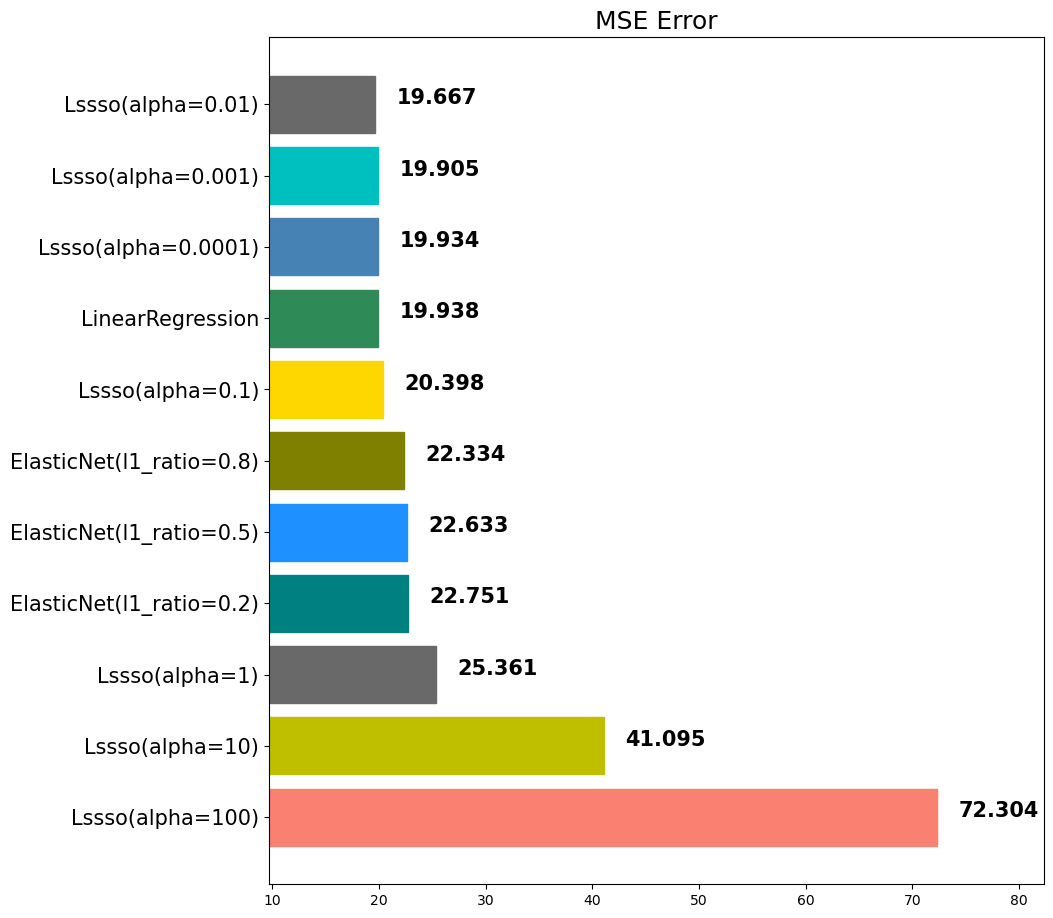

In [ ]:
from sklearn. linear_model import ElasticNet

# L1 규제 비율 후보들
# 0.2 : L2 규제가 더 강함 (계수는 줄이되 0으로는 잘 안 만듦)
# 0.5 : L1, L2 규제를 반반 사용
# 0.8 : L1 규제가 더 강함 (불필요한 변수 제거 효과 큼)
ratios=[0.2,0.5,0.8]

# l1_ratio 값을 하나씩 바꿔가며 실험
for ratio in ratios:

    # ElasticNet 모델 생성
    # alpha : 규제 전체 강도
    # l1_ratio : L1 규제 비율 (나머지는 L2)
    elasticnet=ElasticNet(alpha=0.5,l1_ratio=ratio)
    # 학습 데이터로 모델 학습
    elasticnet.fit(x_train,y_train)
     # 테스트 데이터 예측
    pred=elasticnet.predict(x_test)
    
    # 예측 결과와 실제값을 비교해서
    # MSE(평균제곱오차) 평가
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio),pred,y_test)

In [ ]:
elasticnet_20=ElasticNet(alpha=5,lr_ratio=0.2)
elasticnet_20.fit(x_train,y_train)
